In [1]:
import finnhub
import secrets_stock_news
import datetime

In [3]:
finnhub_client = finnhub.Client(api_key=secrets_stock_news.API_KEY)

In [4]:
str(datetime.date.today())

'2023-06-24'

In [11]:
company_news = finnhub_client.company_news('AAPL', _from=str(datetime.date.today()), to=str(datetime.date.today()))

In [13]:
general_news = finnhub_client.general_news('general', min_id=0)

In [13]:
for news in general_news:
    print(news.keys())
    break

dict_keys(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source', 'summary', 'url'])


In [14]:
len(general_news)

100

In [15]:
for n in general_news:
    print(n.keys())
    break

dict_keys(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source', 'summary', 'url'])


In [34]:
id = []

for news in general_news:
    id.append(news['id'])

if(len(id)):
    print(max(id))

7272796


In [ ]:
while(True):
    general_news = finnhub_client.general_news('general', min_id=0)
    sleep(60)

## Spark

In [22]:
import os

from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [23]:
spark = SparkSession \
        .builder \
        .appName("Stock News") \
        .master("local[*]") \
        .config("spark.jars", os.getcwd() + "../jars2/commons-pool2-2.6.2.jar" + "," + os.getcwd() + "../jars2/kafka-clients-2.6.0.jar"
                + "," + os.getcwd() + "../jars2/spark-sql-kafka-0-10_2.12-3.0.1.jar" + "," + os.getcwd() + "../jars2/spark-token-provider-kafka-0-10_2.12-3.0.1.jar") \
        .appName("Stock News")\
        .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")
spark.conf.set("spark.sql.shuffle.partitions", 1)

In [24]:
KAFKA_TOPIC_NAME = "stock_news"
KAFKA_BOOTSTRAP_SERVER = "localhost:9092"

In [25]:
flower_df = spark \
        .readStream \
        .format("kafka") \
        .option("kafka.bootstrap.servers", KAFKA_BOOTSTRAP_SERVER) \
        .option("subscribe", KAFKA_TOPIC_NAME) \
        .option("startingOffsets", "earliest") \
        .load()

AnalysisException:  Failed to find data source: kafka. Please deploy the application as per the deployment section of "Structured Streaming + Kafka Integration Guide".        

In [27]:
general_news[0].items()

dict_items([('category', 'top news'), ('datetime', 1686864300), ('headline', 'FA Center: Which is worse: Lying about money or losing it?'), ('id', 7273201), ('image', 'https://images.mktw.net/im-700936/social'), ('related', ''), ('source', 'MarketWatch'), ('summary', 'Admitting what you’ve done — the decisions you’ve made and the losses you’ve incurred — can sting.'), ('url', 'https://www.marketwatch.com/story/which-is-worse-lying-about-money-or-losing-it-cfa06368')])

In [28]:
general_news[0].keys()

dict_keys(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source', 'summary', 'url'])

## Postgres test

In [2]:
import psycopg2
# from secrets_stock_news import PSQL_HOST
import secrets_stock_news

In [6]:
conn = psycopg2.connect(
    host=secrets_stock_news.PSQL_HOST,
    database=secrets_stock_news.PSQL_DATABASE,
    user=secrets_stock_news.PSQL_USER,
    password=secrets_stock_news.PSQL_PASSWORD,
    port=secrets_stock_news.PSQL_PORT
)

In [37]:

insert_query = "INSERT INTO news_dev (category, datetime, headline, id, image, related, source, summary, url) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"

In [41]:
with conn.cursor() as cursor:
    try:
        # Execute multiple INSERT statements in a single transaction
        cursor.executemany(insert_query, [tuple(item.values()) for item in general_news])

        # Commit the transaction
        conn.commit()

        print("Data inserted successfully!")
    except (Exception, psycopg2.DatabaseError) as error:
        # Rollback the transaction in case of an error
        conn.rollback()
        print("Error occurred during data insertion:", error)

Data inserted successfully!


In [ ]:
conn.close()

In [36]:
general_news[0]

('top news',
 1687021260,
 ': Another Nvidia board member unloads stock, this time to the tune of $21 million',
 7273675,
 'https://images.mktw.net/im-683956/social',
 '',
 'MarketWatch',
 'Two Nvidia directors have sold valuable chunks of the high-flying stock this week, recent filings show.',
 'https://www.marketwatch.com/story/another-nvidia-board-member-unloads-stock-this-time-to-the-tune-of-21-million-62e9bfbd')

In [3]:
from psql_python import PostgresSQLPython
import sql_statements

In [110]:
p = PostgresSQLPython()
test = p.read_query(sql_statements.NEWS_LAST_2_DAYS_QUERY_PROD)

In [55]:
test = p.read_query('select * from news')

In [23]:
import nltk

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/inistar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import sql_statements
NEWS_7_DAYS = None
NEWS_2_DAYS = None

p = PostgresSQLPython()


def load_2_days_data():
    return p.read_query(sql_statements.NEWS_LAST_2_DAYS_QUERY_PROD)

def load_7_days_data():
    return p.read_query(sql_statements.NEWS_LAST_7_DAYS_QUERY_PROD)


NEWS_2_DAYS = load_2_days_data()

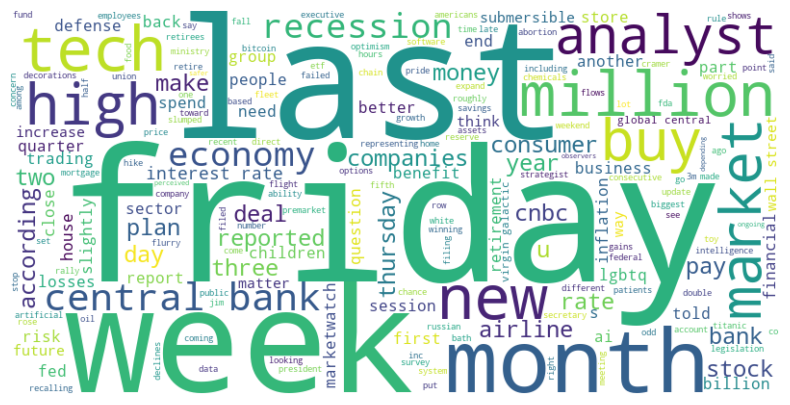

In [37]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_wordcloud(text):

    tokens = text.split()

    filler_words = set(stopwords.words('english'))
    filler_words.update(['said',
                         'say',
                         'stock',
                         'year',
                         'may',
                         'monday',
                         'tuesday',
                         'wednesday',
                         'thursday',
                         'friday',
                         'saturday',
                         'sunday',
                         'us',
                         'company',
                         'week',
                         'stock',
                         'share',
                         'shares',
                         'day',
                         'june',
                         'investor',
                         'investors',
                         'year,',
                         'year-to-date',
                         'years',
                         'u.s.'
                         ])

    # filtered_tokens = [word.lower() for word in tokens if word.lower() not in filler_words]

    filtered_tokens = []
    for word in tokens:
        if word.lower() not in filler_words:
            # print(word.lower())
            filtered_tokens.append(word.lower())

    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(filtered_tokens))

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    

combined_str = general_news['summary'].str.cat(sep=' ')
generate_wordcloud(combined_str)

In [19]:
import pandas as pd
general_news = pd.DataFrame(general_news)

In [61]:
import requests

headers = {"Authorization": f"Bearer {secrets_stock_news.HF_API_TOKEN}"}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

inputs = general_news['summary'].to_list()


payload = {"inputs": inputs}
output = query(payload)




In [103]:
sentiment = []
for result in output:
    sentiment.append(result[0]['label'])

In [104]:
general_news['sentiment'] = sentiment


In [4]:
from finnhub_news_extractor import Finnhub
f = Finnhub()
test = f.read_news()

In [11]:
import pandas as pd
import requests 

def _query(payload, headers):
    response = requests.post(secrets_stock_news.HF_API_URL, headers=headers, json=payload)
    return response.json()

def find_sentiment(df):
    headers = {"Authorization": f"Bearer {secrets_stock_news.HF_API_TOKEN}"}

    df = pd.DataFrame(df)

    inputs = df['summary'].to_list()
    payload = {"inputs": inputs}

    outputs = _query(payload, headers)
    
    sentiment = []
    for output in outputs:
        sentiment.append(output[0]['label'])

    df['sentiment'] = sentiment

    return df

find_sentiment(test)

100


,category,datetime,headline,id,image,related,source,summary,url,sentiment
0,top news,1687629753,This couple quit their jobs and 'sold everythi...,7275598,https://image.cnbcfm.com/api/v1/image/10726196...,,CNBC,"In 2016, Mark and Karla Lemoine bought a Kampg...",https://www.cnbc.com/2023/06/24/couple-quit-jo...,neutral
1,top news,1687627140,Earnings Watch: Q2 profits are set for their b...,7275596,https://images.mktw.net/im-806213/social,,MarketWatch,Wall Street is expecting a third straight quar...,https://www.marketwatch.com/story/q2-profits-a...,negative
2,top news,1687625640,Market Extra: Rebellion in Russia could trigge...,7275594,https://images.mktw.net/im-806392/social,,MarketWatch,Market observers say investors could see a fli...,https://www.marketwatch.com/story/rebellion-in...,positive
3,top news,1687623900,: What we know — and don’t know — about the Ru...,7275595,https://images.mktw.net/im-806418/social,,MarketWatch,What we’re seeing in Russia this weekend appea...,https://www.marketwatch.com/story/what-we-know...,neutral
4,top news,1687622401,Costco's iconic $1.50 hot dog combo has a vira...,7275599,https://image.cnbcfm.com/api/v1/image/10712434...,,CNBC,The Costco hot dog combo is an object of corpo...,https://www.cnbc.com/2023/06/24/costcos-buck-f...,neutral
...,...,...,...,...,...,...,...,...,...,...
95,top news,1687468200,The Ratings Game: Amazon may get a bad rap on ...,7275204,https://images.mktw.net/im-447795/social,,MarketWatch,Morgan Stanley analysts have the sense that so...,https://www.marketwatch.com/story/amazon-may-g...,neutral
96,business,1687468161,Moderna files for FDA approval of updated Covi...,7275183,https://image.cnbcfm.com/api/v1/image/10681204...,,CNBC,Moderna said the submission is based on the FD...,https://www.cnbc.com/2023/06/22/moderna-files-...,neutral
97,top news,1687467480,: Bank borrowing from the Fed rises for 7th st...,7275205,https://images.mktw.net/im-257339/social,,MarketWatch,The amount of money that banks are borrowing f...,https://www.marketwatch.com/story/bank-borrowi...,positive
98,business,1687466875,"Virgin Galactic raises $300 million, seeks ano...",7275180,https://image.cnbcfm.com/api/v1/image/10725995...,,CNBC,Virgin Galactic's growth hinges on its ability...,https://www.cnbc.com/2023/06/22/virgin-galacti...,positive


In [12]:
df 

NameError: name 'df' is not defined

In [15]:
test = pd.DataFrame(test)

In [21]:
conn = psycopg2.connect(
            host=secrets_stock_news.PSQL_HOST,
            database=secrets_stock_news.PSQL_DATABASE,
            user=secrets_stock_news.PSQL_USER,
            password=secrets_stock_news.PSQL_PASSWORD,
            port=secrets_stock_news.PSQL_PORT
        )
def batch_insert(news, insert_query):
    with conn.cursor() as cursor:
        try:
            values = news.values.tolist()
            table_name = 'news_dev'

            # Generate the SQL INSERT statement
            columns = ", ".join(news.columns)
            placeholders = ", ".join(["%s"] * len(news.columns))
            insert_query = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"

            # Execute the INSERT statement for each row of data
            cursor.executemany(insert_query, values)
            # Commit the transaction
            conn.commit()

            print("Data inserted successfully!")
        except (Exception, psycopg2.DatabaseError) as error:
            # Rollback the transaction in case of an error
            # self.conn.rollback()
            print("Error occurred during data insertion:", error)

batch_insert(test, sql_statements.INSERT_QUERY_DEV)

Data inserted successfully!


In [2]:
import requests
import secrets_stock_news

country = 'United States'
api_url = 'https://api.api-ninjas.com/v1/inflation?country={}'.format(country)
response = requests.get(api_url, headers={'X-Api-Key': secrets_stock_news.NINJA_API_KEY})

In [7]:
response.json()[0]['period']

'june 2023'